This notebook is continuation of "Python_Functions_for_Time_Series_Analysis_01", some import python function will  be discussed that will be helpful in many time series cases....

In [1]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (20, 20)
mpl.rcParams['axes.grid'] = False

In [2]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start = datetime.date(2017, 1 ,1)
#end = datetime.date(2020, 7, 2)
end = datetime.datetime.now().date()
url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
result.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

In [3]:
data = pd.read_json(result.content).iloc[:-2,:1]
data.index.name = 'date'
data.index = pd.to_datetime(data.index)
data

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2020-12-21,22718.2250
2020-12-22,23817.3067
2020-12-23,23229.0133


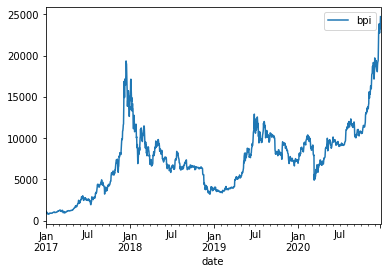

In [4]:
data.plot()

In [5]:
#data.index.dayofweek

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            2, 3, 4, 5, 6, 0, 1, 2, 3, 4],
           dtype='int64', name='date', length=1455)

In [6]:
data.groupby(data.index.dayofweek).mean()

,bpi
date,
0,7407.830024
1,7423.902703
2,7433.701299
3,7434.563758
4,7470.140080
5,7415.470575
6,7372.716215


In [8]:
#data.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=1455)

In [7]:
data.groupby(data.index.month).mean()

,bpi
date,
1,6474.960095
2,5979.032653
3,5241.117152
4,5408.169478
5,6715.698325
6,7074.233533
7,7457.743574
8,8215.418101
9,7792.112536


In [9]:
#data.index.year

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='date', length=1455)

In [10]:
data.groupby(data.index.year).mean()

,bpi
date,
2017,3990.138147
2018,7529.385702
2019,7379.960562
2020,10837.789576


In [11]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


**cumsum()** function gives cummulative sum

In [12]:
data[:5].cumsum()

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [13]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


**pct_change(2)** given you the percentage change of two lags

In [14]:
data[:5].pct_change(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,0.033205
2017-01-04,0.109837
2017-01-05,-0.024255


The expanding() function is used to provide expanding transformations.

In [15]:
data[:5].expanding().sum()

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [16]:
data[:5].expanding().mean()

,bpi
date,
2017-01-01,997.688800
2017-01-02,1007.869400
2017-01-03,1015.518767
2017-01-04,1044.106575
2017-01-05,1036.448260


-------------------